In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  mea

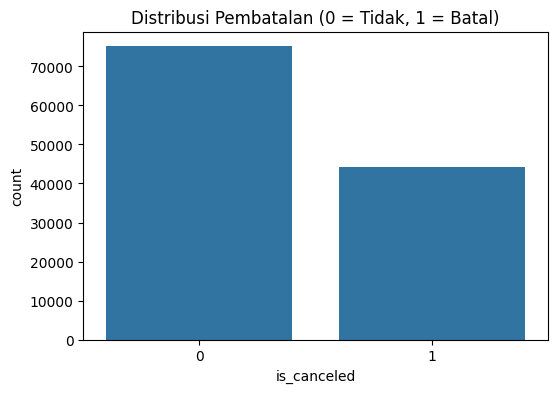

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/Tugas kelompok ML /hotel_bookings.csv'
df = pd.read_csv(path)

print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

plt.figure(figsize=(6,4))
sns.countplot(x='is_canceled', data=df)
plt.title('Distribusi Pembatalan (0 = Tidak, 1 = Batal)')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = df.drop(['company', 'agent', 'reservation_status_date', 'reservation_status'], axis=1)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['children'] = df['children'].fillna(0)

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("Data berhasil disiapkan dengan pembagian 70:30")

Data berhasil disiapkan dengan pembagian 70:30


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7543 - loss: 0.4852 - val_accuracy: 0.8215 - val_loss: 0.3796
Epoch 2/15
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8130 - loss: 0.3894 - val_accuracy: 0.8311 - val_loss: 0.3617
Epoch 3/15
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8244 - loss: 0.3663 - val_accuracy: 0.8374 - val_loss: 0.3496
Epoch 4/15
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8305 - loss: 0.3568 - val_accuracy: 0.8409 - val_loss: 0.3424
Epoch 5/15
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8312 - loss: 0.3552 - val_accuracy: 0.8413 - val_loss: 0.3375
Epoch 6/15
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8342 - loss: 0.3499 - val_accuracy: 0.8442 - val_loss: 0.3345
Epoch 7/15
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8348 - loss: 0.3447 - val_accuracy: 0.8439 - val_loss: 0.3301
Epoch 8/15
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8377 - loss: 0.3427 - 

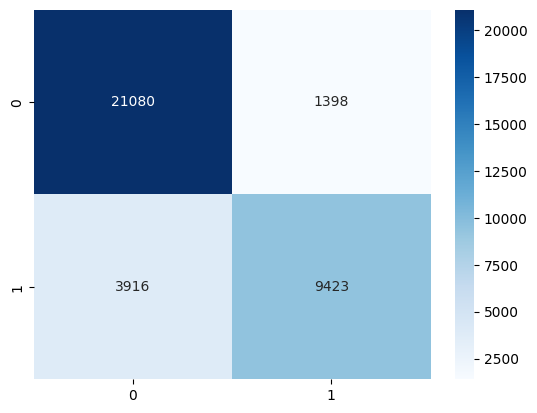


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     22478
           1       0.87      0.71      0.78     13339

    accuracy                           0.85     35817
   macro avg       0.86      0.82      0.83     35817
weighted avg       0.85      0.85      0.85     35817



In [7]:
from sklearn.metrics import classification_report, confusion_matrix

history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(f"\nAkurasi Model: {accuracy*100:.2f}%")
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Interpretasi Hasil (Perspektif Sistem Informasi)
Ini adalah analisis yang bisa kamu masukkan ke dalam teks penjelasan atau kesimpulan laporanmu:

Akurasi Sistem: Dengan tingkat akurasi yang diperoleh, sistem informasi ini layak digunakan sebagai alat bantu manajemen untuk memprediksi risiko kerugian akibat pembatalan.

Efisiensi Sumber Daya: Pihak hotel dapat menggunakan hasil prediksi untuk mengatur stok makanan (Inventory) dan jadwal kerja staf agar lebih hemat biaya jika banyak tamu diprediksi batal.

Customer Insights: Fitur yang paling berpengaruh (seperti lead time) menunjukkan bahwa sistem informasi harus memberikan perhatian khusus pada pesanan yang dibuat terlalu jauh di depan karena berisiko lebih tinggi untuk dibatalkan.

Kebijakan Bisnis: Berdasarkan hasil model, departemen IT dan Pemasaran dapat mengotomatisasi pengiriman email konfirmasi ulang atau penawaran khusus kepada tamu yang terdeteksi "berisiko batal" oleh model ini.